This notebook contains the details on our estimation of electricity consumption.

# TODO:

- document power assumptions
- show survey results for hours used
- demonstrate major electricity uses in survey

We iterate over a list of appliances and find the hours and energy associated with each appliance.

We convert the data into tidy format in order to facilitate visualization.  The column names for the weekly hour observations are converted into values in a single column and the values associated are in a separate column.

Grid connected areas show increases in most appliance categories.
Radio use is roughly constant and fridge use isn't clear in the box plot.

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
survey = pd.read_excel('../data-survey/sentani-merged-cleaned-anonymous-2014-11-29.xlsx',
                       na_values=[''])
!md5 ../data-survey/sentani-merged-cleaned-anonymous-2014-11-29.xlsx

MD5 (../data-survey/sentani-merged-cleaned-anonymous-2014-11-29.xlsx) = fbe0545262decd839172b2d96c8384ed


In [2]:
import pysentani as sti
survey['access_type'] = sti.access_type(survey)

# we may want to do this more fine-grained so we know what we are omitting
#survey = survey.fillna(0)

powers = {'TV':0.075, 'fridge':0.200, 'radio':0.100, 'fan':0.135, 'rice_cooker':0.700, 'lighting':0.400}
appliance_list = ['TV', 'fridge', 'radio', 'fan', 'rice_cooker', 'lighting']

for appliance in appliance_list:
    # create column label from appliance names
    wk_col = 'app_{}_per_wk'.format(appliance)
    hr_col = 'app_{}_hrs'.format(appliance)
    energy_col = 'daily_{}_energy'.format(appliance)
    weekly_hr_col = 'weekly_{}_hrs'.format(appliance)
    survey[weekly_hr_col] = survey[wk_col] * survey[hr_col]    
    survey[energy_col] = survey[weekly_hr_col] / 7 * powers[appliance]
    
wk_columns = [f for f in survey.columns if 'weekly' in f]
id_columns = ['village_name', 'demand_point', 'access_type']

columns = wk_columns + id_columns
plt_data = pd.melt(survey[columns], value_vars=wk_columns, id_vars=id_columns)

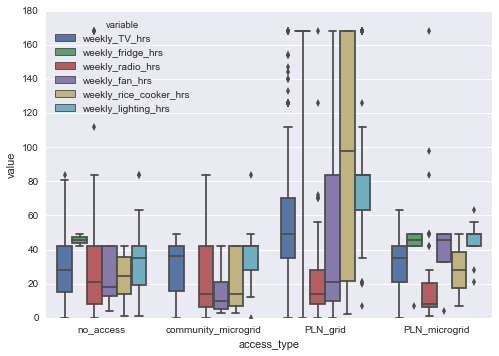

In [3]:
sns.boxplot(data=plt_data[plt_data['value']<=168], hue='variable', y='value', x='access_type')

These strip plots lets us see the per-household data more clearly.  

Refrigerator use in grid locations becomes more prevalent and is used continuously.  The microgrid numbers suggest that refrigerators are used 6 or 7 hours per day.

Rice cooker usage also shows a large increase both usage and duration.

TV usage shows an increase in hours.

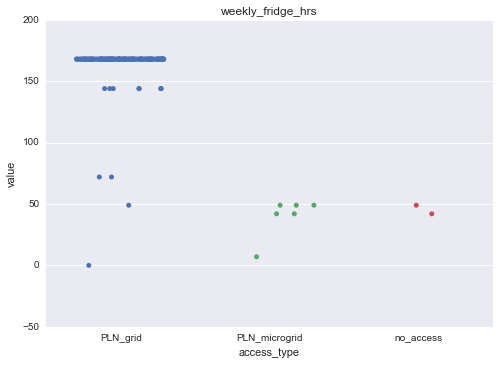

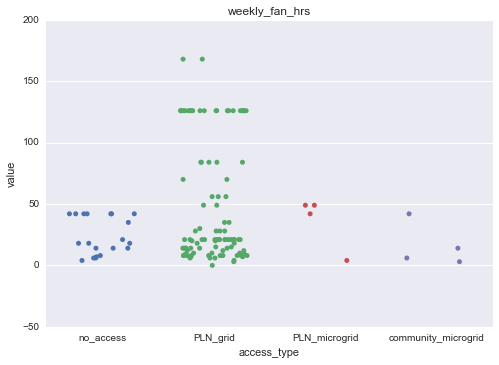

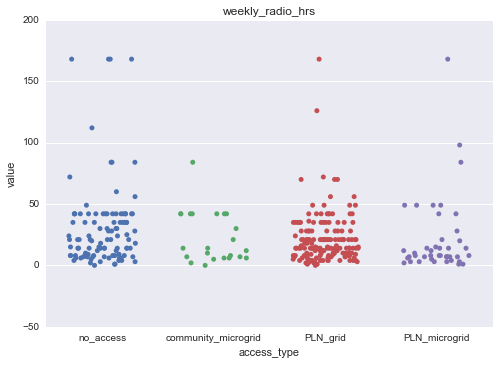

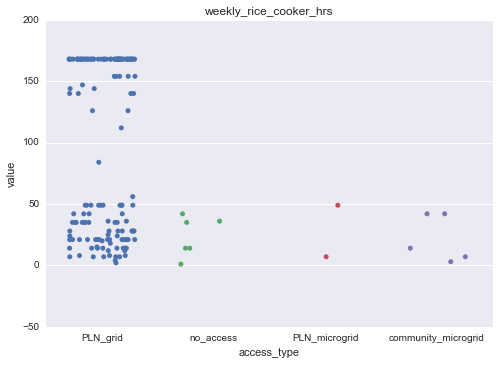

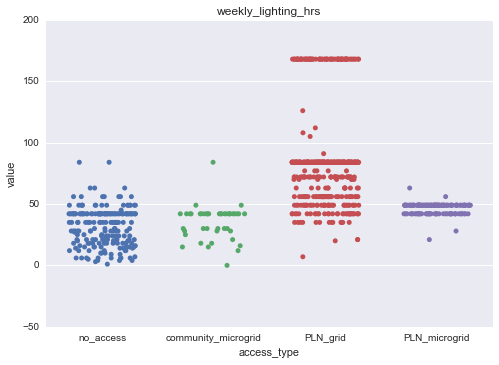

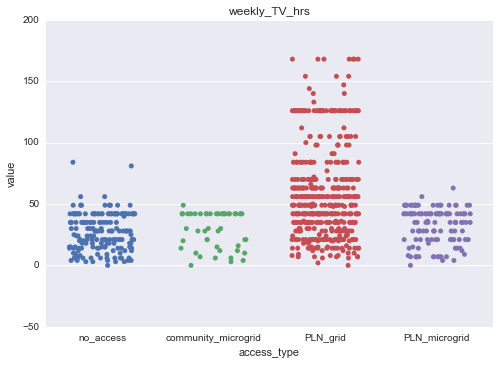

In [4]:
appliances = ['fridge', 'fan', 'radio', 'rice_cooker', 'lighting', 'TV']
for a in appliances:
    variable = 'weekly_{}_hrs'.format(a)
    tmp_data = plt_data[(plt_data['value']<=168) & (plt_data['variable']==variable)]
    ax = sns.stripplot(data=tmp_data, y='value', x='access_type', jitter=0.3)
    ax.set_title(variable)
    plt.show()